In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Set random seed for reproducibility
tf.random.set_seed(42)

# Check the shape
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In [5]:
def scheduler(epoch, lr):
    ro = 0.01
    lr = (1 / (1 + ro * epoch)) * lr
    return lr


In [6]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(16, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()


2025-04-26 21:21:00.402518: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Set learning rate decay
lr_decay = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=256,
    verbose=1,
    callbacks=[lr_decay]
)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4273 - loss: 6.7121 - val_accuracy: 0.7920 - val_loss: 0.7695 - learning_rate: 0.0010
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8138 - loss: 0.7083 - val_accuracy: 0.8932 - val_loss: 0.4179 - learning_rate: 9.9010e-04
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8906 - loss: 0.4302 - val_accuracy: 0.9232 - val_loss: 0.3311 - learning_rate: 9.7069e-04
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9146 - loss: 0.3275 - val_accuracy: 0.9348 - val_loss: 0.2848 - learning_rate: 9.4241e-04
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9315 - loss: 0.2606 - val_accuracy: 0.9420 - val_loss: 0.2476 - learning_rate: 9.0617e-04
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9426 - loss: 0.2100 - val_accuracy: 0.9483 - val_loss: 0.2206 - learning_rate: 8.6302e-04
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9

In [8]:
# Predict class probabilities
pred = model.predict(X_test)

# Convert probabilities to class labels
predictions = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
# Calculate accuracy manually
accuracy = np.sum(predictions == y_test) / len(y_test)

print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9482


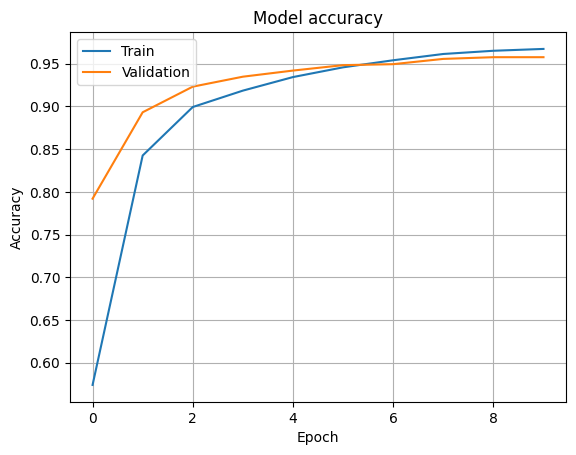

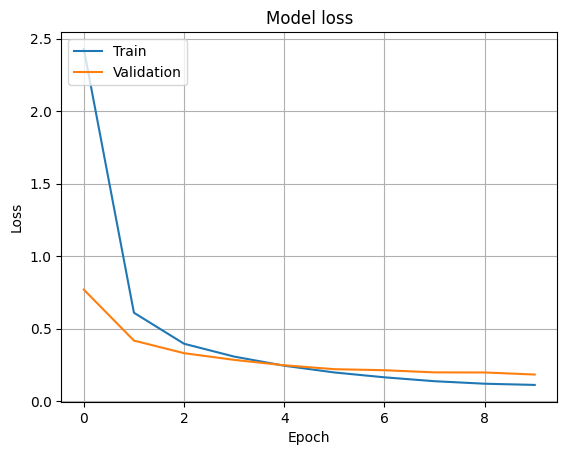

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()
